## **Diwali Sales Analysis**
### **Problem Statement**
- With the upcoming Diwali season, there is a need to develop a comprehensive marketing strategy to maximize sales and optimize inventory management for a retail business. 
- Based on historical sales data, the goal is to identify key regional trends, zone-wise strategies, product focus areas, insights from product IDs, order frequency tactics, and targeted demographic segments. 
- The objective is to leverage this information to tailor marketing efforts, inventory planning, and promotional activities effectively, ultimately driving higher sales during the Diwali period.

### **Step 1: Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

<code>pip install mysql.connector.python</code>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing the necessary libraries to establish a connection with the MySQL server, enabling exploratory data analysis (EDA) to gain insights from the dataset.

### **Step 2: Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [2]:
df = pd.read_csv(r"D:\Python\Exploratory Data Analysis\Diwali_sales\Diwali.csv", encoding="unicode_escape")

Analyzing the Data

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 11239 observations and 13 variables in our dataset

 
head() will display the top 5 observations of the dataset

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

Data Overview:
- DataFrame with 11251 entries, 15 columns, and 1.3+ MB memory usage.

Key Columns:
- User_ID, Cust_name, Product_ID, Gender, Age, Marital_Status, State, Zone, Occupation, Product_Category, Orders, and Amount.

Data Types:
- Integer for User_ID, Age, Marital_Status, and Orders.
- Float for Amount, Status, and unnamed1.
- Object for categorical columns.

Exploratory Analysis:
- Visualize data distributions and explore relationships between variables.
- Consider feature engineering based on EDA insights.

In [7]:
df.nunique()

User_ID             3755
Cust_name           1250
Product_ID          2351
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
Status                 0
unnamed1               0
dtype: int64

In [8]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

User_ID : [1002903 1000732 1001990 ... 1001542 1004378 1005258]
Cust_name : ['Sanskriti' 'Kartik' 'Bindu' ... 'Chris' 'Madan Mohan' 'Nicole']
Product_ID : ['P00125942' 'P00110942' 'P00118542' ... 'P00307142' 'P00044742'
 'P00296942']
Gender : ['F' 'M']
Age Group : ['26-35' '0-17' '18-25' '55+' '46-50' '51-55' '36-45']
Age : [28 35 16 25 61 26 34 20 46 24 48 29 54 19 30 53 83 33 40 39 32 36 55 27
 72 45 43 47 22 52 18 21 38 37 23 49 42 50 31 44 41 66 15 51 77 87 79 71
 88 58 82 62 92 12 63 17 13 67 90 56 75 81 64 73 84 14 76 86 89 68 91 85
 70 80 65 74 69 78 57 60 59]
Marital_Status : [0 1]
State : ['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']
Zone : ['Western' 'Southern' 'Central' 'Northern' 'Eastern']
Occupation : ['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'IT Sector' 'Media' 'Banking' 'Retail'

### **Step 3: Data Cleaning**

nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

**Missing Values Calculation**

isnull() is widely been in all pre-processing steps to identify null values in the data

In our example, data.isnull().sum() is used to get the number of missing records in each column

In [9]:
df.isnull().sum()
#df.notnull().sum()
#df.notna().sum()
#df1.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(8)

**Removing Unnecessory Columns**

In [11]:
df1 = df.drop(['User_ID','Status','unnamed1'],axis=1,)

In [12]:
df1.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


**Handling The inconsistency Error**

In [13]:
df1['Amount'].fillna(df1['Amount'].mean(), inplace=True)

In [14]:
df1.isnull().sum()

Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df1.drop_duplicates(inplace=True)

In [16]:
df1.duplicated().sum()

np.int64(0)

In [17]:
df1.shape

(11243, 12)

### **Creating The New Feature**

In [18]:
df1['Age Group'].unique()

array(['26-35', '0-17', '18-25', '55+', '46-50', '51-55', '36-45'],
      dtype=object)

In [19]:
df1['Age_category'] = df1['Age Group'].replace({'0-17':'Tean', '18-25':'Young', '26-35':'Adult', '36-45':'Adult', '46-50':'Middle Age','51-55':'Middle Age', '55+':'Senior'})

In [20]:
df1.columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Age_category'],
      dtype='object')

In [21]:
df1['Gender'].replace({'F':'Female', 'M':'Male'}, inplace=True)
df1['State'].replace({'Andhra\xa0Pradesh':'Andhra Pradesh'}, inplace=True)

In [ ]:
df1['State'].unique()

In [ ]:
df1.head()

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [24]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11243.0,35.422841,12.756369,12.0,27.0,33.0,43.0,92.0
Marital_Status,11243.0,0.420261,0.493623,0.0,0.0,0.0,1.0,1.0
Orders,11243.0,2.488749,1.114960,1.0,1.0,2.0,3.0,4.0
Amount,11243.0,9454.084476,5218.941128,188.0,5444.0,8111.0,12672.0,23952.0


In [25]:
df1.describe(include='object').T

,count,unique,top,freq
Cust_name,11243,1250,Vishakha,42
Product_ID,11243,2351,P00265242,53
Gender,11243,2,Female,7838
Age Group,11243,7,26-35,4538
State,11243,16,Uttar Pradesh,1944
Zone,11243,5,Central,4294
Occupation,11243,15,IT Sector,1586
Product_Category,11243,18,Clothing & Apparel,2653
Age_category,11243,5,Adult,6823


- Count: 11239 users.
- Mean age: 35.42 years, with a standard deviation of 12.75.
- Marital status: Approximately 42% are married (mean: 0.42).
- Average of 2.49 orders per user, with a standard deviation of 1.12.
- Order quantities range from 1 to 4, with 50% having 2 or fewer orders.
- Average amount spent is ₹9,453.61, with a standard deviation of ₹5,222.36.
- Amounts range from ₹188 to ₹23,952, with 25% of users spending below ₹5,443.

**Before we do EDA, lets separate Numerical and categorical variables for easy analysis**

In [ ]:
cat_cols = df1.select_dtypes(exclude=['int', 'float']).columns.tolist()
num_cols = df1.select_dtypes(include = np.number).columns.tolist() 
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

### **EDA Univariate Analysis**

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

Age


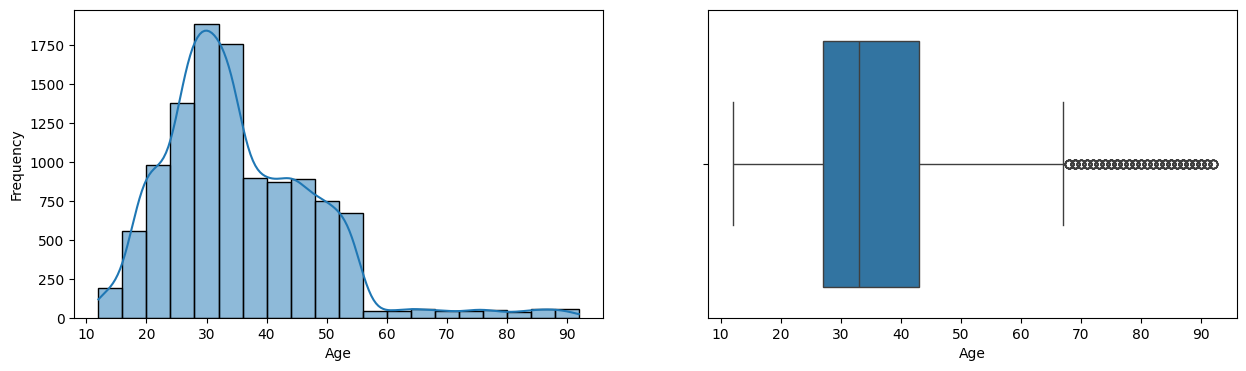

Marital_Status


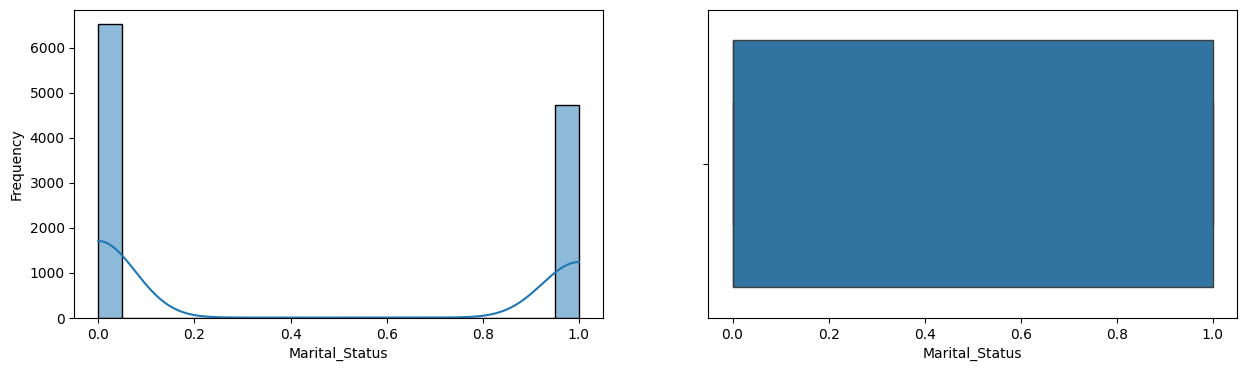

Orders


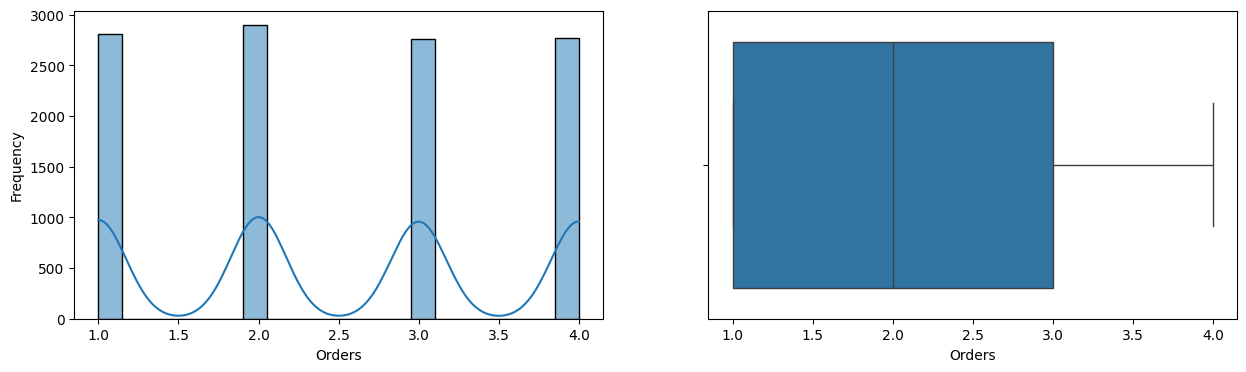

Amount


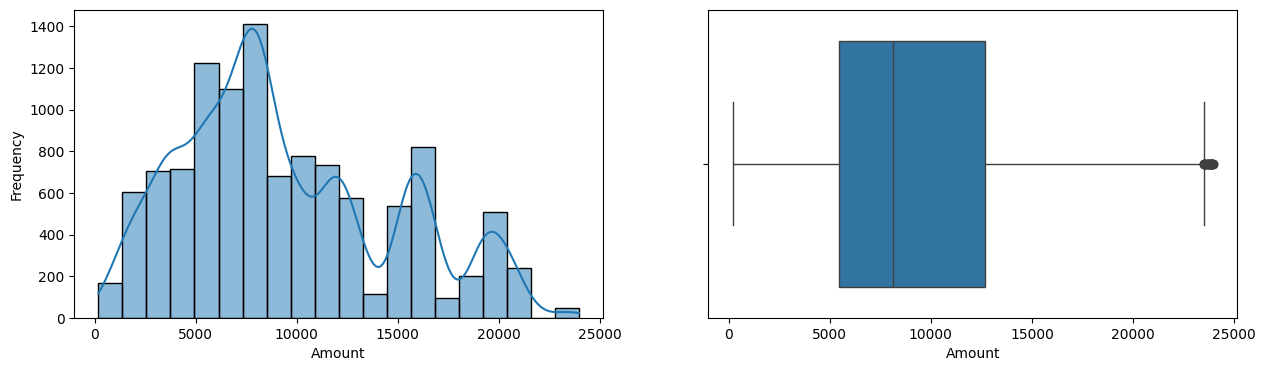

In [27]:
for col in num_cols:
    print(col)
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df1[col], kde=True, alpha=0.5, bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df1[col])
    plt.xlabel(col)
    
    plt.show()

Age and Amount has outliers it get can be ignored.

categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors influencing car price

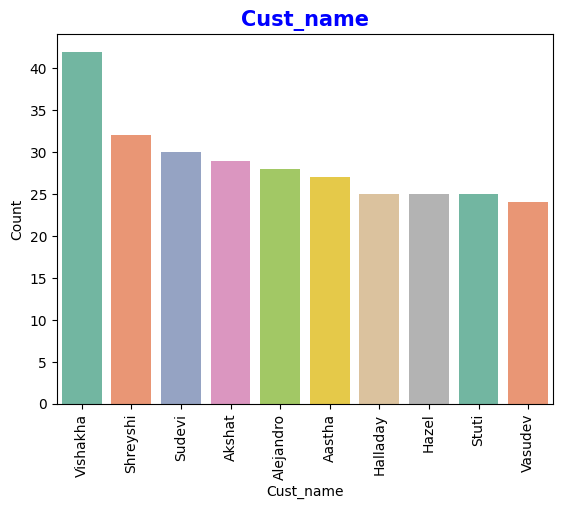

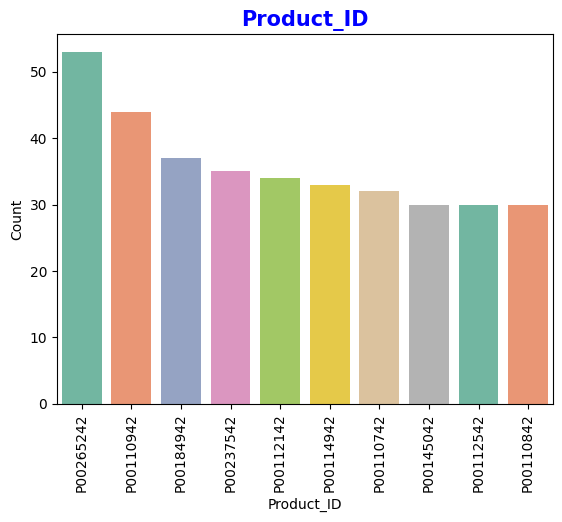

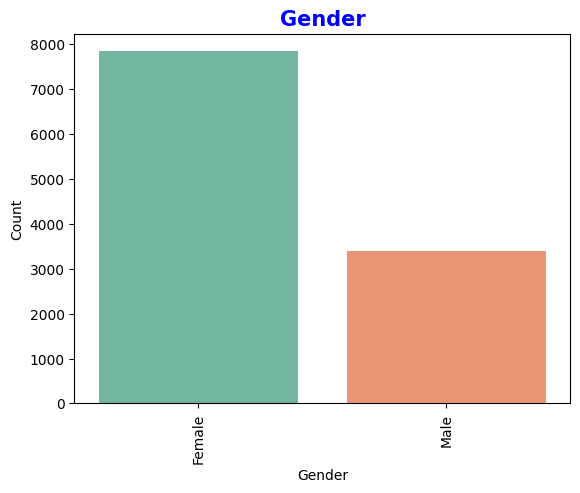

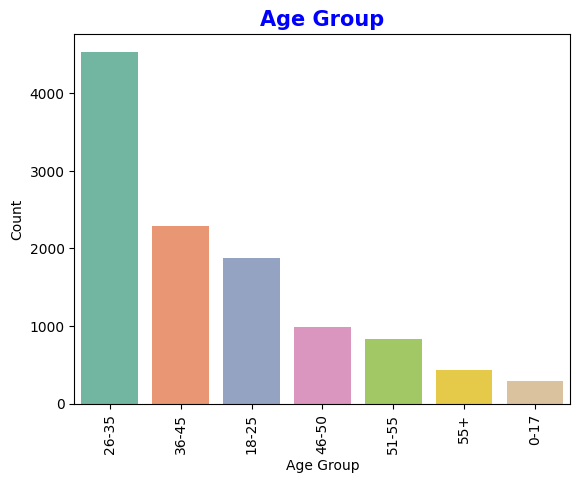

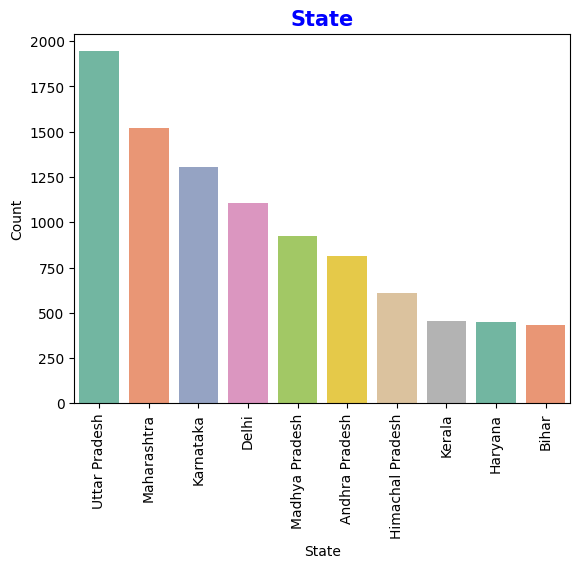

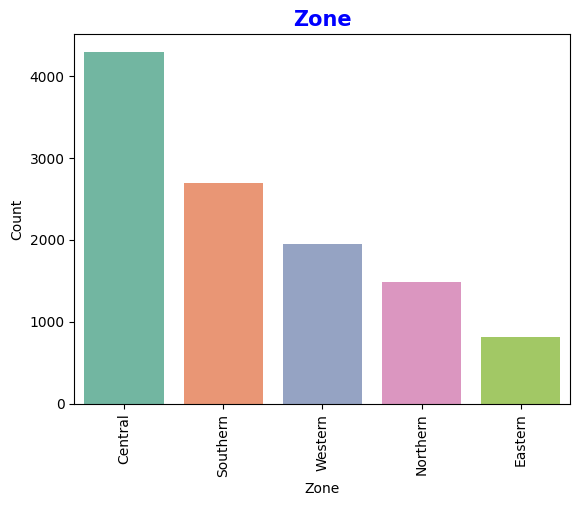

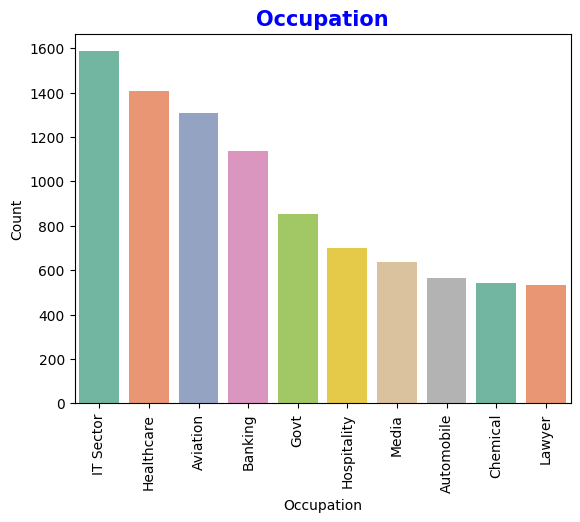

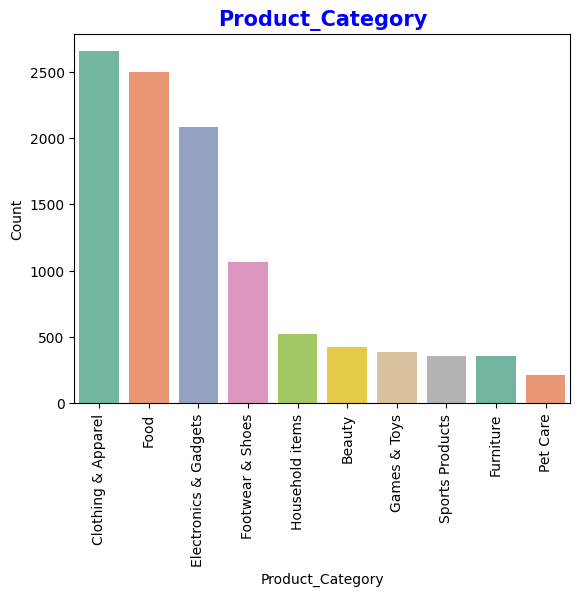

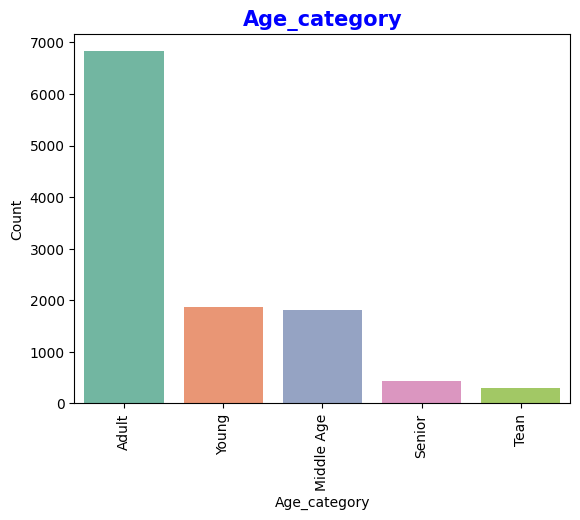

In [28]:
for col in cat_cols:
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().head(10).index, palette='Set2')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.title(col, fontsize=15, fontweight='bold', color='blue')
    plt.show()

From the count plot, we can have below observations
- Vishaka has customer who Purchased most in the Diwali
- "P00265242" this product id has sold the most
- in the Gender category female are purchased high
- Uttarpradesh and Maharashtra has a hishest sales in Diwali 
- in the Zone wise central 
- inproduct category clothing and food has sold thn most

### **Step 8: EDA Bivariate Analysis**

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

### **Top Selling Product Category**

In [43]:
df1.groupby(['Product_ID']).agg({'Amount':'sum'}).head(5)

,Amount
Product_ID,
P00000142,248716.0
P00000242,57517.0
P00000342,44963.0
P00000442,12292.0
P00000542,18837.0


In [44]:
df1[df1['Product_ID'] == 'P00000142']

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_category
160,Hemant,P00000142,Female,36-45,42,0,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,2,20691.0,Adult
375,Shweta,P00000142,Male,46-50,50,0,Karnataka,Southern,IT Sector,Furniture,4,20208.0,Middle Age
1164,Pauline,P00000142,Female,36-45,43,1,Uttar Pradesh,Central,Chemical,Tupperware,2,16713.0,Adult
1891,Barbara,P00000142,Female,18-25,22,0,Uttar Pradesh,Central,Retail,Food,4,15659.0,Young
1916,Adrian,P00000142,Female,18-25,19,1,Delhi,Central,Media,Food,1,15633.0,Young
1980,Kinney,P00000142,Male,46-50,50,0,Maharashtra,Western,Lawyer,Food,2,15572.0,Middle Age
2116,Trupti,P00000142,Female,18-25,23,0,Karnataka,Southern,Food Processing,Food,3,15465.0,Young
2162,McGrath,P00000142,Female,26-35,30,0,Maharashtra,Western,IT Sector,Food,2,15415.0,Adult
2481,Armstrong,P00000142,Male,26-35,34,1,Maharashtra,Western,Automobile,Sports Products,3,13598.0,Adult
3247,Denise,P00000142,Female,55+,78,0,Uttar Pradesh,Central,Media,Food,4,11969.0,Senior


In [30]:
top_selling = df1[df1['Product_ID'] == 'P00000142'].groupby('Product_Category')['Amount'].sum()
print(top_selling.max())

125793.0


In [31]:
df1['Product_Category'].value_counts()

Product_Category
Clothing & Apparel       2653
Food                     2493
Electronics & Gadgets    2082
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       99
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: count, dtype: int64

### **Top Selling Product**

In [32]:
df1['Product_ID'].value_counts().head()

Product_ID
P00265242    53
P00110942    44
P00184942    37
P00237542    35
P00112142    34
Name: count, dtype: int64

In [45]:
df1['Product_ID'].value_counts().tail()

Product_ID
P00326042    1
P00255342    1
P00347942    1
P00273642    1
P00035742    1
Name: count, dtype: int64

In [46]:
search_title = "P00265242"

# Perform the search
result = df1[df1['Product_ID'].str.contains(search_title, case=False)]

# Display the result
result

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Age_category
62,Bruce,P00265242,Female,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,21325.0,Adult
208,Murray,P00265242,Female,46-50,50,1,Uttar Pradesh,Central,Banking,Furniture,1,20588.0,Middle Age
349,Ann,P00265242,Female,26-35,32,0,Karnataka,Southern,Retail,Footwear & Shoes,4,20260.0,Adult
591,Craig,P00265242,Female,55+,63,0,Madhya Pradesh,Central,Agriculture,Food,3,19487.0,Senior
812,Jeremy,P00265242,Female,18-25,20,1,Haryana,Northern,Food Processing,Food,4,19175.0,Young
963,Dipali,P00265242,Male,51-55,53,1,Gujarat,Western,Aviation,Food,1,18959.0,Middle Age
1309,Akshata,P00265242,Female,26-35,35,0,Delhi,Central,Food Processing,Footwear & Shoes,1,16506.0,Adult
1347,Hughes,P00265242,Female,36-45,38,0,Delhi,Central,Retail,Footwear & Shoes,2,16451.0,Adult
1561,Steven,P00265242,Female,0-17,12,0,Himachal Pradesh,Northern,Textile,Games & Toys,2,16149.0,Tean
1630,Cortes,P00265242,Female,55+,81,1,Madhya Pradesh,Central,IT Sector,Food,3,15917.0,Senior


In [47]:
print(f"Net sales {round(df1['Amount'].sum())}")

Net sales 106292272


Which Category has the highest orders

In [49]:
total_order_ID = df1.groupby('Product_ID')['Orders'].sum().nlargest()
total_order_ID

Product_ID
P00265242    127
P00110942    116
P00237542     91
P00184942     82
P00025442     79
Name: Orders, dtype: int64

In [50]:
total_ordre_zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_ordre_zone

Zone
Central     10636
Southern     6744
Western      4866
Northern     3724
Eastern      2011
Name: Orders, dtype: int64

In [54]:
total_ordre_zone.values

array([10636,  6744,  4866,  3724,  2011])

#### **Order analysis**

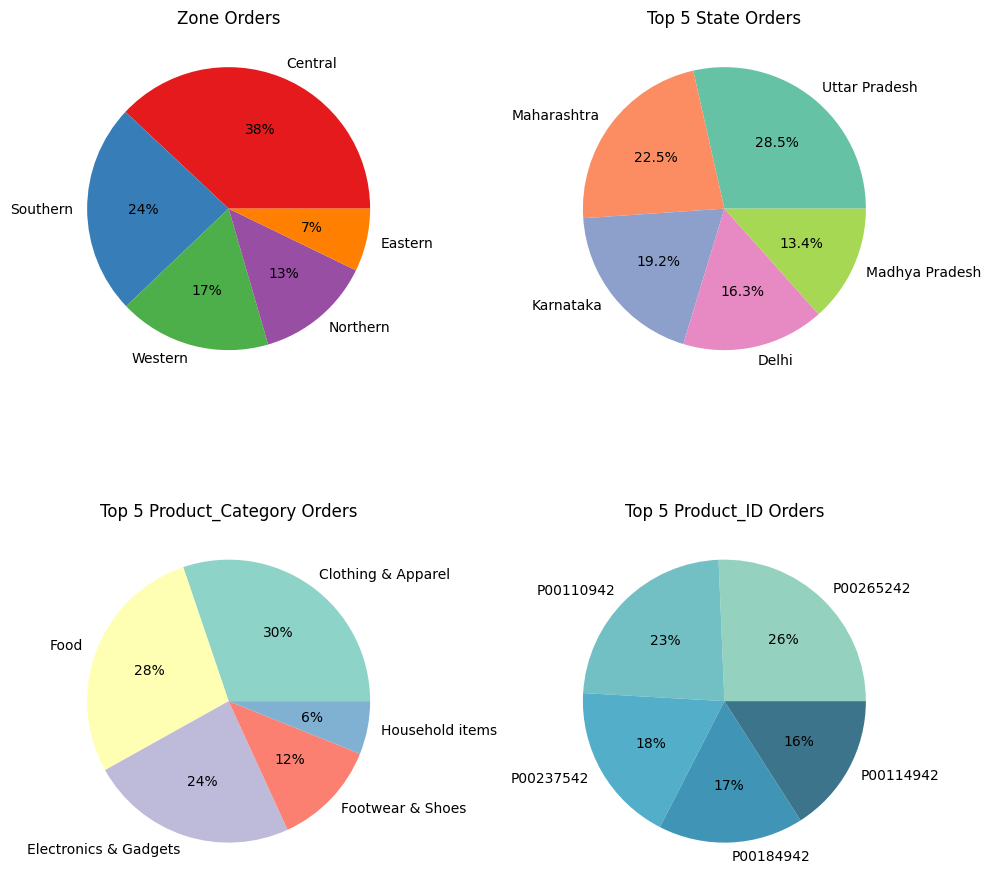

In [55]:
# Calculate the total amount for each category
total_ordre_zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df1.groupby('State')['Orders'].sum().sort_values(ascending=False).head()
total_order_category = df1.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).head()
total_order_ID = df1.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).head()

# Create a new figure for the pie chart
plt.figure(figsize=(10, 10))

# Plotting pie chart for Zone Vs Price
plt.subplot(2, 2, 1)
plt.pie(total_ordre_zone, labels=total_ordre_zone.index, autopct='%1.f%%', colors=sns.color_palette("Set1"))
plt.title("Zone Orders")

# Plotting pie chart for Orders Vs Price
plt.subplot(2, 2, 2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.1f%%', colors=sns.color_palette("Set2"))
plt.title("Top 5 State Orders") 

# Plotting pie chart for Age Group Vs Price
plt.subplot(2, 2, 3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.f%%', colors=sns.color_palette("Set3"))
plt.title("Top 5 Product_Category Orders")

# Plotting pie chart for Gender Vs Price
plt.subplot(2, 2, 4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=sns.color_palette("GnBu_d"))
plt.title("Top 5 Product_ID Orders")

plt.tight_layout()
plt.show()

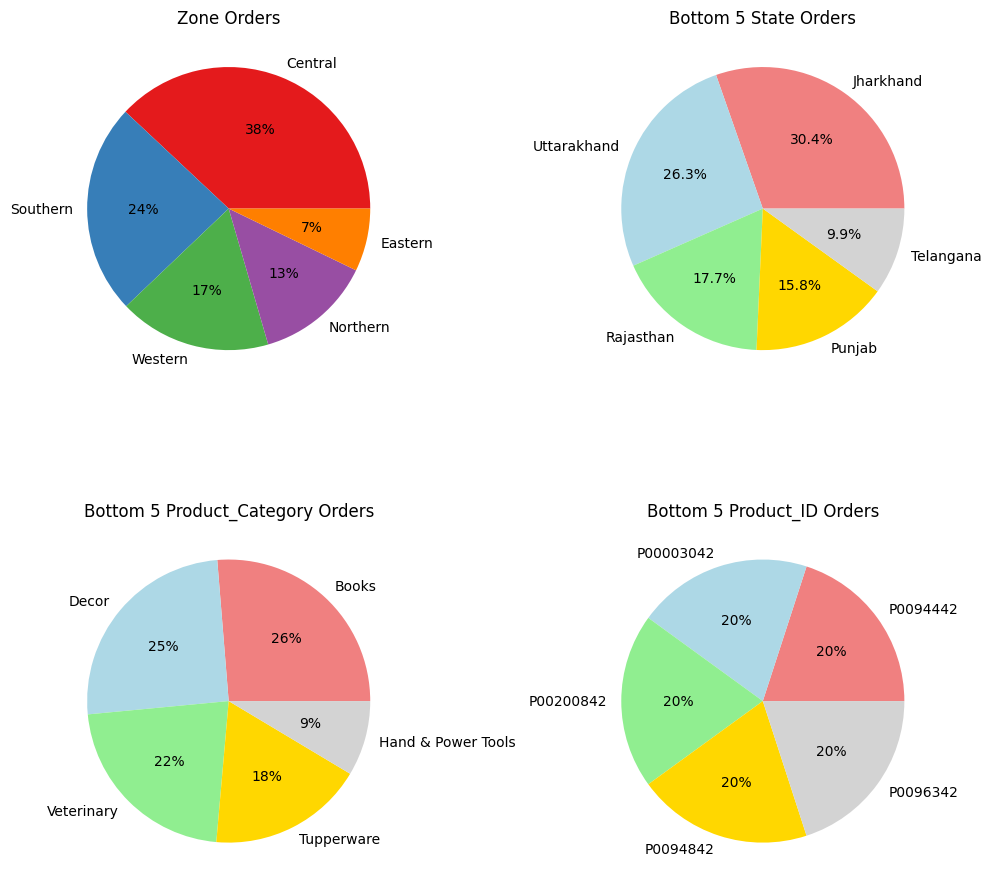

In [40]:
# Calculate the total amount for each category
total_ordre_zone = df1.groupby('Zone')['Orders'].sum().sort_values(ascending=False)
total_order_state = df1.groupby('State')['Orders'].sum().sort_values(ascending=False).tail()
total_order_category = df1.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).tail()
total_order_ID = df1.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).tail()

# Create a new figure for the pie chart
plt.figure(figsize=(10, 10))

# Plotting pie chart for Zone Vs Price
plt.subplot(2, 2, 1)
plt.pie(total_ordre_zone, labels=total_ordre_zone.index, autopct='%1.f%%', colors=sns.color_palette("Set1"))
plt.title("Zone Orders")

# Plotting pie chart for Orders Vs Price
plt.subplot(2, 2, 2)
plt.pie(total_order_state, labels=total_order_state.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Bottom 5 State Orders") 

# Plotting pie chart for Age Group Vs Price
plt.subplot(2, 2, 3)
plt.pie(total_order_category, labels=total_order_category.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Bottom 5 Product_Category Orders")

# Plotting pie chart for Gender Vs Price
plt.subplot(2, 2, 4)
plt.pie(total_order_ID, labels=total_order_ID.index, autopct='%1.f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold', 'lightgray'])
plt.title("Bottom 5 Product_ID Orders")

plt.tight_layout()
plt.show()

### **Sales Analysis**

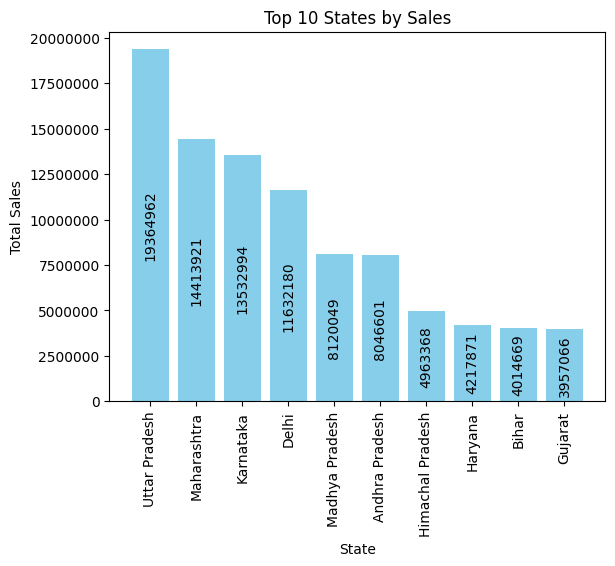

In [57]:
state_sale = df1.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
 
value = plt.bar(state_sale.index, state_sale.values, color='skyblue')
plt.bar_label(value, fmt='%.f', rotation=90, label_type="center")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 10 States by Sales')
plt.xticks(rotation=90)
plt.show()

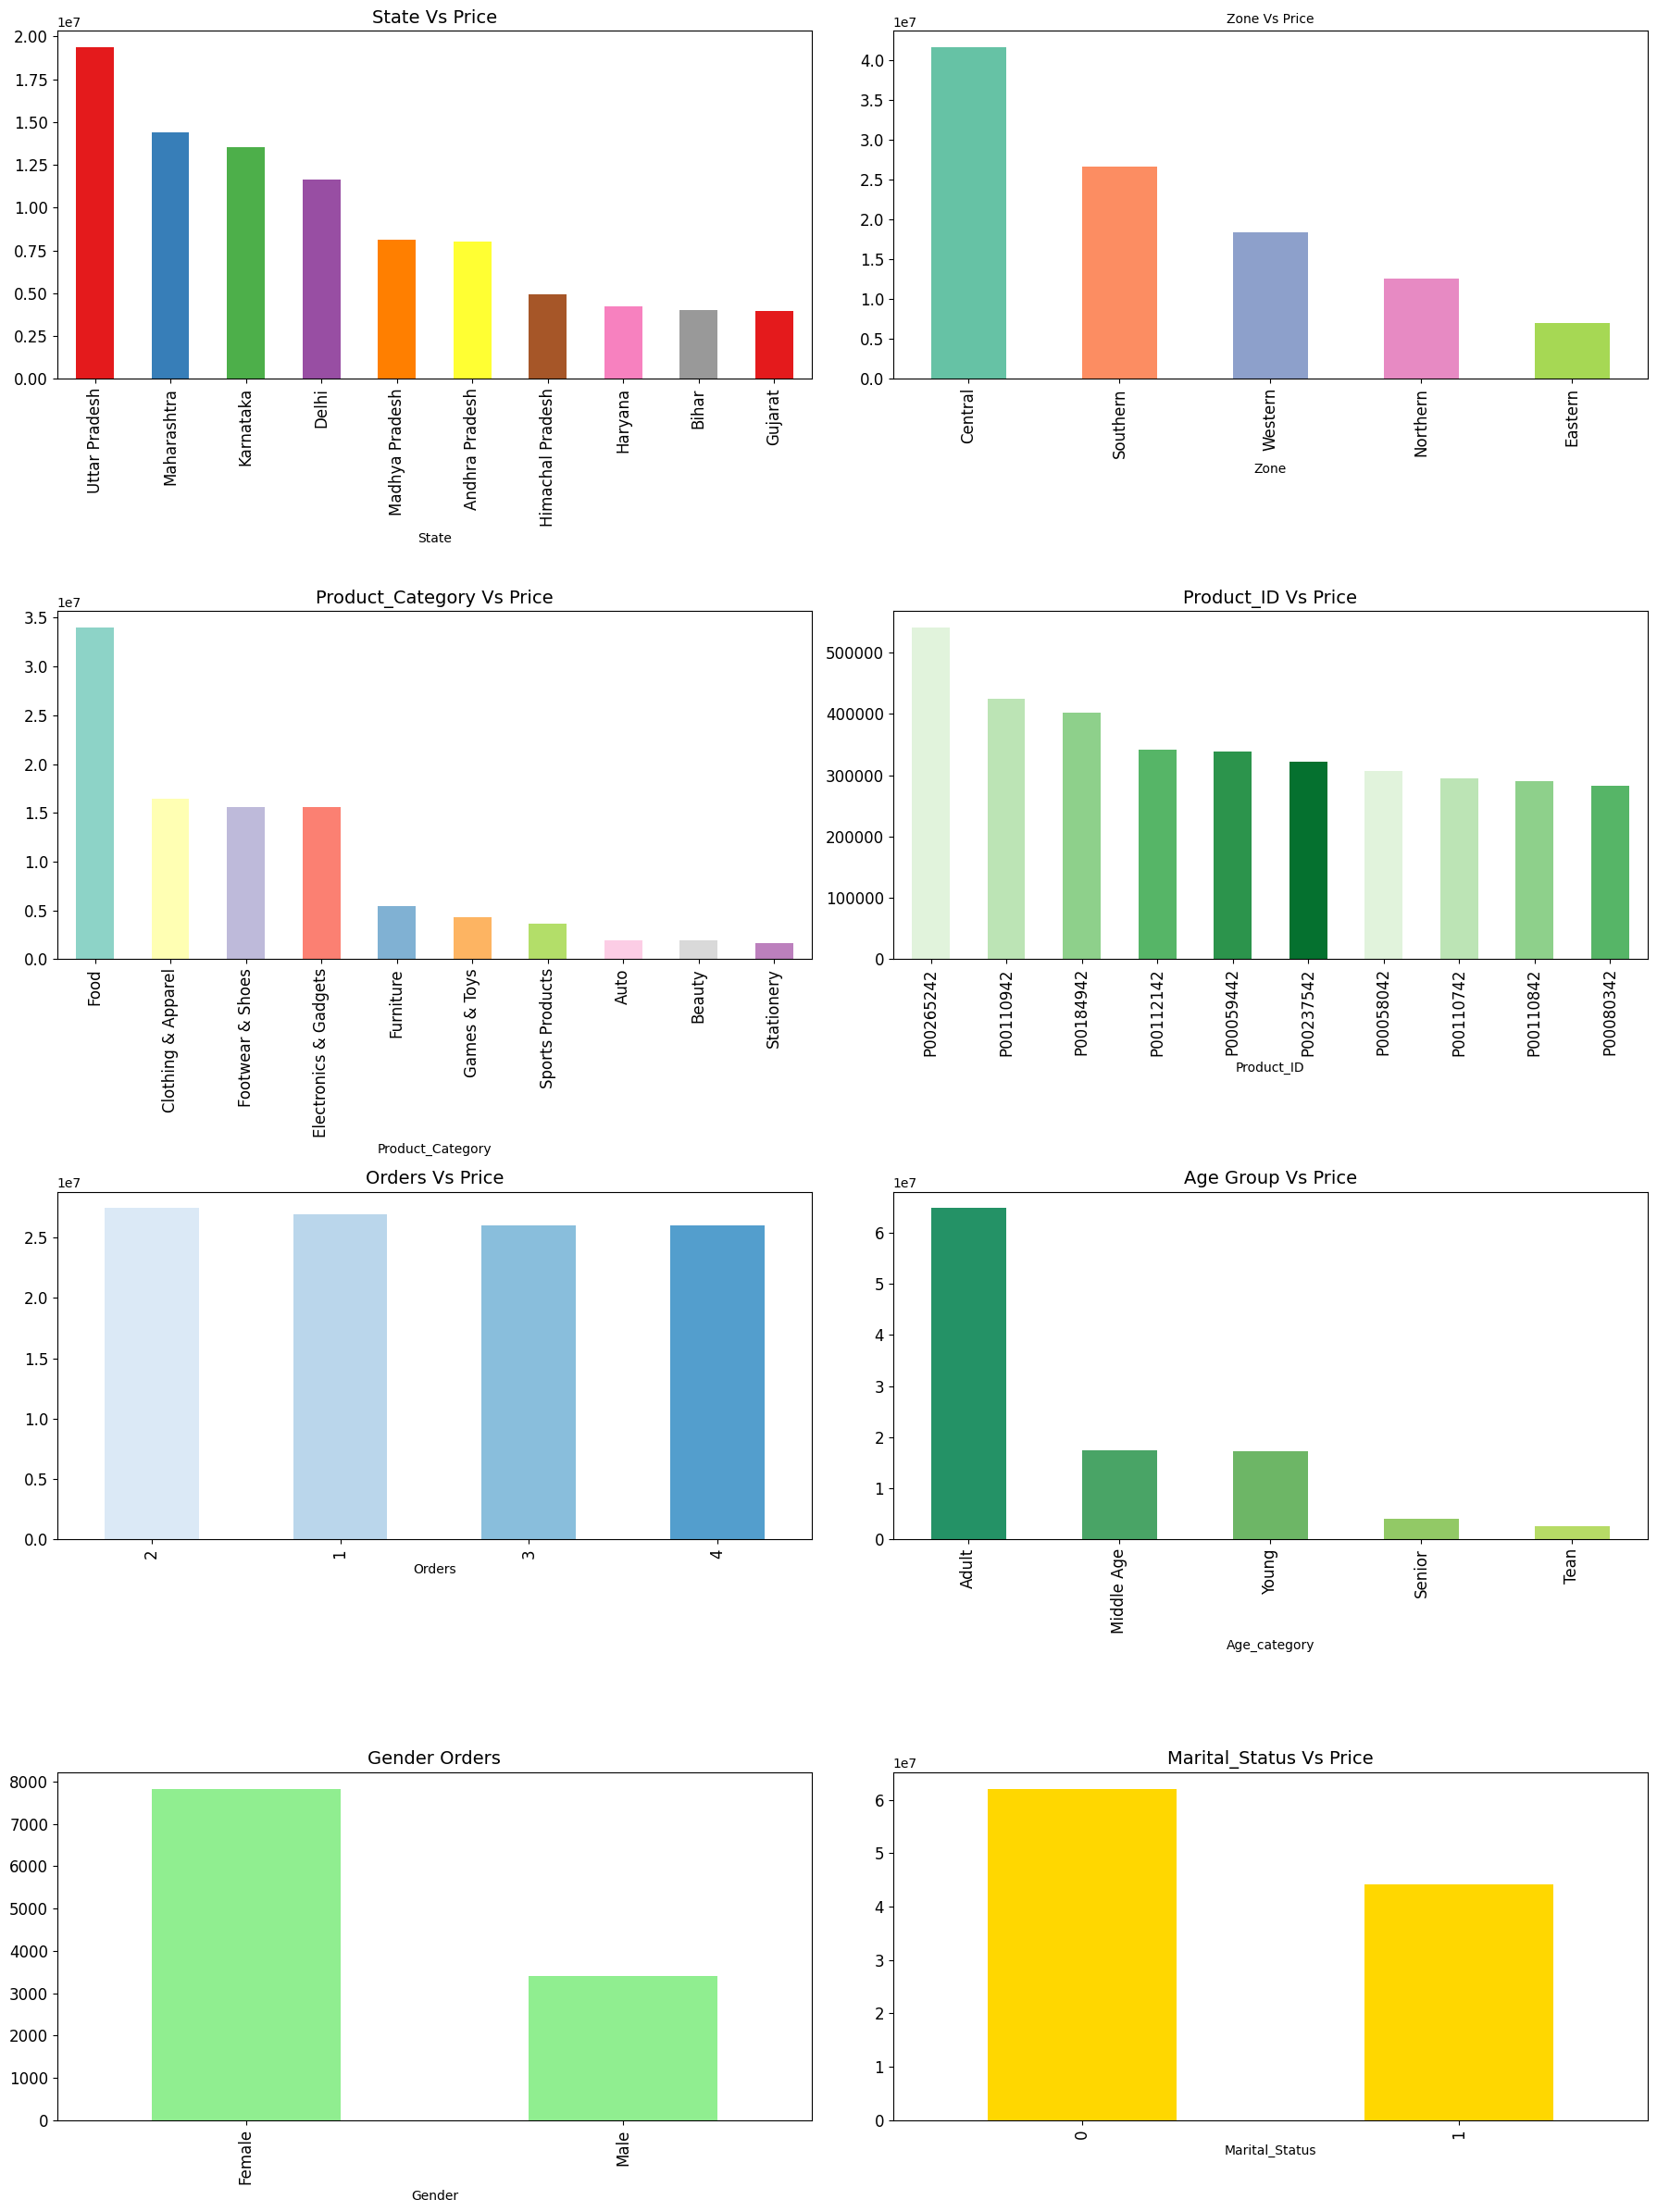

In [42]:
fig, axarr = plt.subplots(4, 2, figsize=(18, 24))

# State Vs Price
df1.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[0][0], fontsize=12, color=sns.color_palette('Set1'))
axarr[0][0].set_title("State Vs Price", fontsize=14)

# Zone Vs Price
df1.groupby('Zone')['Amount'].sum().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12, color=sns.color_palette('Set2'))
axarr[0][1].set_title("Zone Vs Price", fontsize=10)

# Product_Category Vs Price
df1.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12, color=sns.color_palette('Set3'))
axarr[1][0].set_title("Product_Category Vs Price", fontsize=14)

# Product_ID Vs Price
df1.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12, color=sns.color_palette('Greens'))
axarr[1][1].set_title("Product_ID Vs Price", fontsize=14)

# Brand Vs Price
df1.groupby('Orders')['Amount'].sum().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12, color=sns.color_palette('Blues'))
axarr[2][0].set_title("Orders Vs Price", fontsize=14)

# Age Group Vs Price
df1.groupby('Age_category')['Amount'].sum().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12, color=sns.color_palette('summer'))
axarr[2][1].set_title("Age Group Vs Price", fontsize=14)

# Gender Vs Orders
df1.groupby('Gender')['Orders'].count().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12, color='lightgreen')
axarr[3][0].set_title("Gender Orders", fontsize=14)

# Marital_Status Vs Price
df1.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12, color='gold')
axarr[3][1].set_title("Marital_Status Vs Price", fontsize=14)

plt.tight_layout()
plt.show()

**State-wise Analysis:**

Uttar pradesh, Maharashtra, Karnataka and Delhi have the highest average number of orders during Diwali.

**Zone-wise Analysis:**

The 39% of Central zone leads in terms of the total amount of sales during Diwali, followed by Soutern, Western, Northern, and  Eastern zones.

**Product Category Analysis:**

The top-selling product categories during Diwali are food, clothing and apparel, Electronic and Gadgests,  and Footwaer and shoes based on the total amount of sales.

**Product ID Analysis:**

Products with IDs like P00265242, P00110942, P00184942, and P00112142 have consistently high average orders during Diwali.

**Orders Analysis:**

The order frequency analysis shows that the highest total amount is generated from orders with 2 items has a 26%, followed by orders with 1, 4, and 3 items. This suggests that customers tend to purchase more items in a single order during Diwali.

**Age Group Analysis:**

Customers in the age group has 40% of Adult contribute significantly to Diwali sales, followed by customers in the age groups Middle Age, Senior

**Gender and Marital Status Analysis:**

41% of Female customers with a marital status of 0 (single) contribute the most to Diwali sales, followed by Female customers with a marital status of 1, Male customers with a marital status of 0, and Male customers with a marital status of 1.

## **Conclusion:**

- Regional Impact: Diwali sales are particularly strong in states like Uttar pradesh, Maharashtra, Karnataka and Delhi. This information can help in targeting marketing efforts more effectively.

- Zone-wise Strategy: Focus on promotional activities and inventory planning in the Central zone, as it leads in total sales during Diwali.

- Product Focus: Prioritize marketing and stock levels for products in the food, clothing and apparel, Electronic and Gadgests,  and Footwear and shoes, as they are the top performers.

- Product ID Insights: Products with IDs like P00265242, P00110942, P00184942, and P00112142 have consistently high demand, and efforts should be made to promote and maintain their availability.

- Order Frequency Strategy: Encourage customers to purchase more items in a single order by offering bundled deals or discounts for multiple items.

- Age Group Targeting: Target marketing campaigns towards customers in the Adult age group, as they contribute significantly to Diwali sales.

- Gender and Marital Status Targeting: Focus on single females, as they contribute the most to Diwali sales. Consider targeted promotions for different gender and marital status segments.